# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
#Откроем файл real_estate_data с данными и сохраним его в переменной data и выведим первые 5 строк таблицы на экран
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
#Посмотрим общую информацию о данных таблицы data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
#Проверим таблицу на налачие пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [4]:
#Изучим описательную статистику, посмотри на среднее занчение, медианное и пр.
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Файл открыли и изучили. Данный файл содержит 23699 строки и 22 колонки. Таблица содержит 3 столбца с данными представляющие
целые числа(тип int), 14 столбцов c вещественными числами (тип float), 3 столбца с типом object и 2 столбца с булевым типом (тип bool)
Так же при изучении таблицы можно заметить в некоторых столбцах несоответствие типа данных, например в столбцах days_exposition,
balcony,parks_around3000 и др. - должны быть данные представляющие целые числа, а в столбце is_apartment данные с булевым типом (тут либо да, либо нет)
Так же в таблице допущено множество пропусков, такие пропуски могли быть вызваны человеческим фактором, могли неуказать какие-то конкретные параметры, возможно из-за его отсутствия
(предположим что балкона нет, и в этой строке ничего и не стали указывать), а так же могла произойти техническая ошибка, 
которая могла возникнуть в результате переноса данных, или же при копировании данных, сбой может произойти даже во время записи
данных.
Можно отметить, что в столбце ceiling_height- медианное и среднее значение похоже на правду, а вот минимальное - 1 метр,
а максимальное - 100, похоже на неверное указанние данных в некоторых строках, и многое другое.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

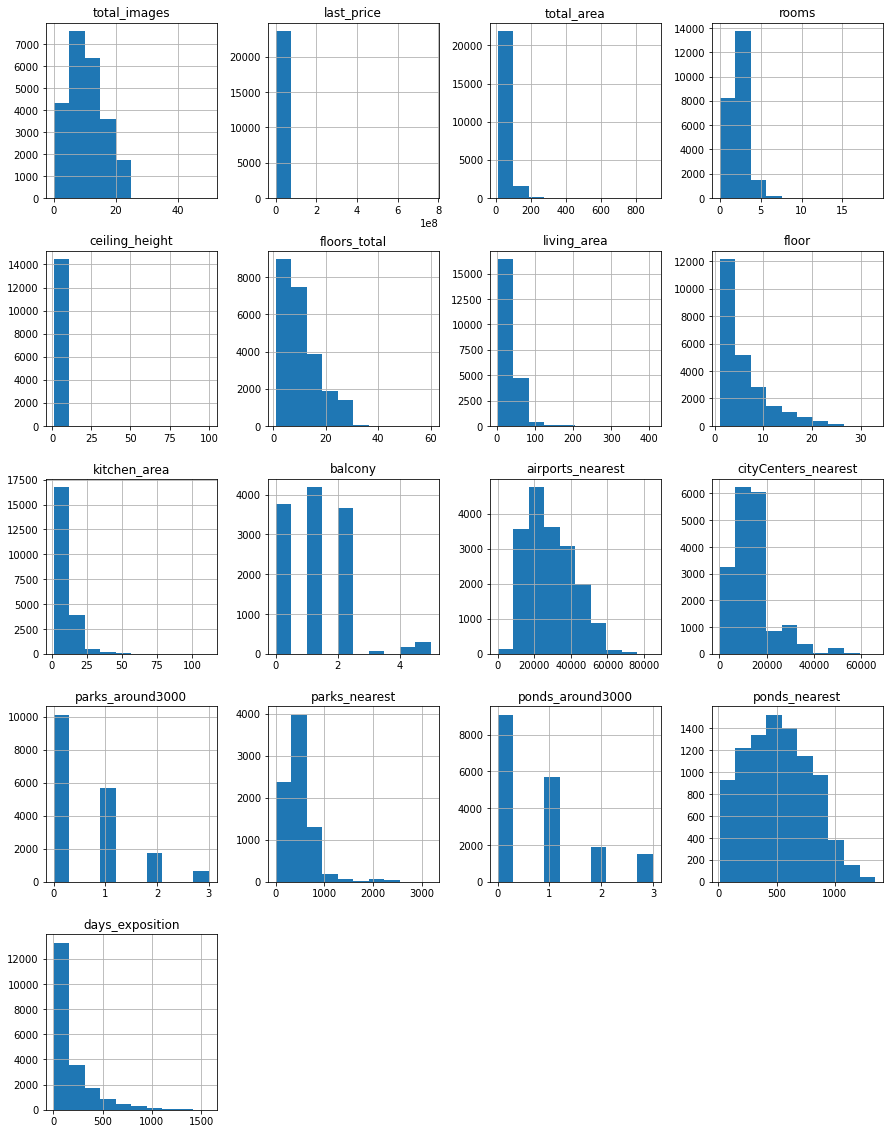

In [5]:
data.hist(figsize=(15, 20))

### Предобработка данных

In [6]:
#Еще раз посмотрим, в каких столбцах есть пропущенные значения.
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
#Более детально рассмотрим каждый столбец с пропущенными значениями, и заполним там, где это возможно
#Столбец ceiling_height - высота потолков (м), изучим уникальные значения в данном столбце
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [8]:
#Потолки с высотой менее 2,5м и более 5м, а так же пустые строки - заменним медианным значением
def replace_large_values(row):
    if row > 5:
        return None
    if row < 2.5:
        return 2.5
    return row 
data['ceiling_height'] = data['ceiling_height'].apply(replace_large_values)
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [9]:
#Проверим, данный столбец, все ли выбивающиеся за норму значения и пропуски удалось заменить
data['ceiling_height'].isna().sum()

0

In [10]:
#Столбец floors_total - всего этажей в доме. Так как количество допущенных пропусков в данном столбце особую роль не играет, мы
#заменим их на значения соседнего столбца
data['floors_total'] = data['floors_total'].fillna(data['floor'])

In [11]:
#Проверим, данный столбец, все ли выбивающиеся за норму значения и пропуски удалось заменить
data['floors_total'].isna().sum()

0

In [12]:
#Столбец is_apartment - апартаменты (булев тип), а у нас object, необходимо исправить, но прежде заменим пропущенные значения
#на False
data['is_apartment'] = data['is_apartment'].fillna(False)

In [13]:
#Проверим
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [14]:
#Проверим, данный столбец на количество пропусков
data['is_apartment'].isna().sum()

0

In [15]:
#Столбец balcony - число балконов. Предположим, что если балконов нет, то их и не указали, поэтому заменим пропущенное значение - 0
data['balcony'] = data['balcony'].fillna(0)

In [16]:
#Проверим, данный столбец на количество пропусков
data['balcony'].isna().sum()

0

Жилая площадь сильнее всего зависит от общей площади, однако не вся общая площадь является жилой, и их соотношение будет
зависить от количества комнат, поэтому необходимо расчитать медианное значение для количества комнат.

Столбец living_area - жилая площадь в квадратных метрах (м²) и kitchen_area - площадь кухни в квадратных метрах (м²)

In [17]:
# Изучим статистику living_area
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [18]:
#Посмотрим на корреляцию, и найдем самую сильную взаимосвязь
data.corr().sort_values(by='living_area', ascending=False)['living_area'].reset_index().head()

,index,living_area
0,living_area,1.000000
1,total_area,0.939537
2,rooms,0.845977
3,last_price,0.566492
4,kitchen_area,0.428674


In [19]:
#Изучим статистику kitchen_area
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [20]:
#Посмотрим на корреляцию, и найдем самую сильную взаимосвязь
data.corr().sort_values(by='kitchen_area', ascending=False)['kitchen_area'].reset_index().head()

,index,kitchen_area
0,kitchen_area,1.000000
1,total_area,0.609121
2,last_price,0.519869
3,living_area,0.428674
4,ceiling_height,0.334430


Площадь кухни так же сильнее всего зависит от общей площади, поэтому расчеты будут производится так же, как и для living_area

In [21]:
# Добавим столбцы доли жилой площади в общей и доли кухни в общей площади
data['kitchen_share'] = data['kitchen_area'] / data['total_area']
data['living_share'] = data['living_area'] / data['total_area']

In [22]:
#Так как в квартирах студиях кухня предположительно располагается внутри комнаты, то в данных квартирах проставим значение 0
data.loc[data['studio'] == True, 'kitchen_area'] = 0

In [23]:
area_median = (data
                    .pivot_table(index='rooms', values=['kitchen_share', 'living_share'], aggfunc='median')
                    .reset_index())
area_median

,rooms,kitchen_share,living_share
0,0,NaN,0.689655
1,1,0.247839,0.482488
2,2,0.161075,0.585009
3,3,0.128571,0.631667
4,4,0.112245,0.659740
5,5,0.105386,0.651842
6,6,0.099502,0.679412
7,7,0.083717,0.681670
8,8,0.109170,0.688475
9,9,0.049620,0.628251


In [24]:
#Расчитаем медианное значение по количеству комнат, и заполнить пропуски для living_area и kitchen_area
for room in range(1, 20):
    data.loc[data['rooms'] == room, 'living_area'] = (
        data.loc[data['rooms'] == room, 'living_area']
        .fillna(data.loc[data['rooms'] == room, 'total_area'] *
                area_median[area_median['rooms'] == room]['living_share'].sum()))
    data.loc[data['rooms'] == room, 'kitchen_area'] = (
        data.loc[data['rooms'] == room, 'kitchen_area']
        .fillna(data.loc[data['rooms'] == room, 'total_area'] *
                area_median[area_median['rooms'] == room]['kitchen_share'].sum()))

In [25]:
#проверим написание названий городов
data['locality_name'].unique().tolist()

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

In [26]:
#посмотрим, сколько уникальных значений
len(data['locality_name'].unique())

365

In [27]:
#заменяем "ё" на "е"
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)

In [28]:
#посмотрим, сколько уникальных значений осталось после
len(data['locality_name'].unique())

331

In [29]:
#проверим сколько отсуствующих значений в столбце с названием города
data['locality_name'].isna().sum()

49

In [30]:
#Считаю, что отсутствующие данные необходимо удалить, так как без информации о городе, нельзя сделать конкретных выводов
#а по имеющимся данным, определить самостоятельно какой конкретно город необходимо указать нет возможности, да и отсутствующих
#данных мало, их удаление не повлияет на выводы
data = data.dropna(subset=['locality_name'])

In [31]:
#проверим удалились ли строки
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           23636 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23591 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [32]:
#Произведем замену в существующем столбце, с обозначениями одних и тех же населённых пунктов но по разному
#(напр.'городской поселок Назия'- 'поселок городского типа Назия',), для корректного анализа
old_word = 'городской поселок Большая Ижора', 'городской поселок Лесогорский', 'городской поселок Мга', 'городской поселок Назия', 'городской поселок Павлово', 'городской поселок Рощино', 'городской поселок Советский', 'поселок при железнодорожной станции Вещево', 'поселок при железнодорожной станции Приветнинское'
new_word = 'поселок городского типа Большая Ижора', 'поселок городского типа Лесогорский', 'поселок городского типа Мга', 'поселок городского типа Назия', 'поселок городского типа Павлово', 'поселок городского типа Рощино', 'поселок городского типа Советский', 'поселок станции Вещево', 'поселок станции Приветнинское'
data['locality_name'] = data['locality_name'].replace(old_word, new_word)

In [33]:
#Проанализируем столбец days_exposition - сколько дней было размещено объявление (от публикации до снятия), для начала 
#проверим сколько отсуствующих значений в столбце
data['days_exposition'].isna().sum()

3180

Так как данный столбец говорит нам о том, сколько дней объявление "провисело" до наступления продажи, то его мы не можем 
заполнить средним или медианным значением, так как данные пропуски могут быть связаны с тем, что , недвижимость еще 
не продана и она "ожидает" на сайте.

Аналогично считаю, что оставшиеся столбцы, airports_nearest — расстояние до ближайшего аэропорта в метрах (м),
cityCenters_nearest — расстояние до центра города (м), parks_around3000 — число парков в радиусе 3 км,
parks_nearest — расстояние до ближайшего парка (м), ponds_around3000 — число водоёмов в радиусе 3 км,
ponds_nearest — расстояние до ближайшего водоёма (м), так как нет возможности с точностью вычеслить данные пропуски, 
а заполнение их средним или медианным значением может привести к искаженным результатам.

In [34]:
#создадим словарь для столбцов,тип данных которых необходимо изменить на целочисленный, так будет проще воспринимать значения.
changing_types = {'balcony': int,
                  'floors_total': int
             }

data = data.astype(changing_types, errors='ignore')

In [35]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                14
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area               59
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
kitchen_share            2269
living_share             1898
dtype: int64

- общая площадь квартиры

In [36]:
data['total_area'].shape[0]

23650

In [37]:
def boxplot(column, measure):
    fig, ax = plt.subplots()
    plt.title('Распределение '+column+' (без выбросов)')
    ax = apartments_info.boxplot(column, showfliers=False)
    plt.ylabel(measure)
    plt.show()

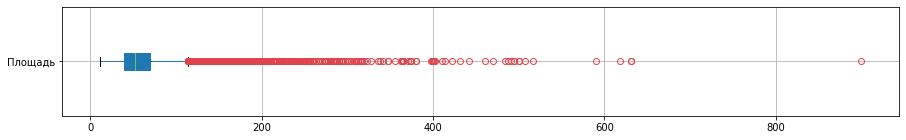

In [38]:
#Построим диаграмму размаха, чтобы увидеть явные выбросы
total_area_no_emissions=data.boxplot('total_area', vert=False, figsize=(15,2), patch_artist=True, flierprops=dict(markeredgecolor="#e0434b"),
            medianprops=dict(color='#71c451'))
total_area_no_emissions.set_yticklabels(['Площадь'])
plt.show()

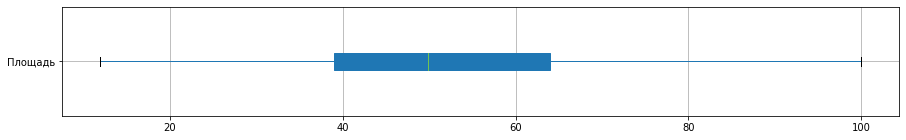

In [39]:
#Удалим выбросы
data.drop(data[data['total_area'] > 100].index, inplace=True)
total_area_no_emissions=data.boxplot('total_area', vert=False, figsize=(15,2), patch_artist=True, flierprops=dict(markeredgecolor="#e0434b"),
            medianprops=dict(color='#71c451'))
total_area_no_emissions.set_yticklabels(['Площадь'])
plt.show()

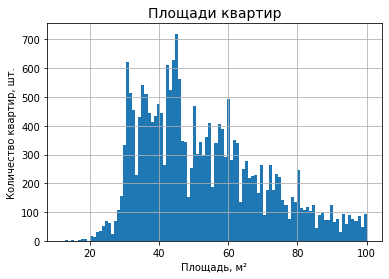

In [40]:
#Теперь посмотрим нашу гистрограмму, с новыми значениями
data.hist('total_area', bins=100)
plt.title('Площади квартир', size=14)
plt.xlabel('Площадь, м²')
plt.ylabel('Количество квартир, шт.')
plt.show()

In [41]:
data['total_area'].shape[0]

21820

Мы почистили столбец общая плащадь квартрры от выбросов, было удалено чуть больше 7% от изначального объема.

- количество комнат 

In [42]:
data['rooms'].shape[0]

21820

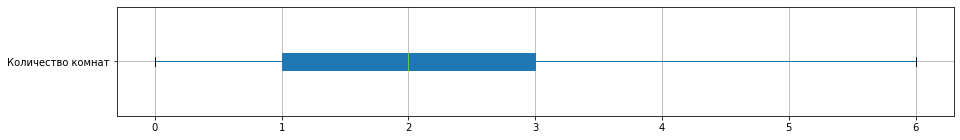

In [43]:
#Построим диаграмму размаха, чтобы увидеть явные выбросы
rooms_no_emissions=data.boxplot('rooms', vert=False, figsize=(15,2), patch_artist=True, flierprops=dict(markeredgecolor="#e0434b"),
            medianprops=dict(color='#71c451'))
rooms_no_emissions.set_yticklabels(['Количество комнат'])
plt.show()

Видно, что большая часть квартир имеет 1, 2 и 3 комнаты, но так же имеет хвост, это могут быть реальные комнаты, так как бывают и двухуровневые квартиры, с большим числом комнат. Считаю что данные удалять не стоит, так как это не похож на выброс, от которго необходимо избавится. И соответственно на итоговое решение не сильно повлияет.

- стоимость квартиры

Для удобности чтения столбца 'last_price' поделем его на 1 млн.

In [44]:
data['last_price'] = data['last_price'] / 1000000

In [45]:
data['last_price'].shape[0]

21820

In [46]:
data['last_price'].describe()

count    21820.000000
mean         5.088921
std          2.984261
min          0.430000
25%          3.304380
50%          4.450000
75%          6.100000
max         53.000000
Name: last_price, dtype: float64

Имеем 21 820 значений, минимальная стоимость квартир - 430000 рублей, максимальная стоимость составляет - 53млн.рублей. Достаточно большой разброс, но в то же время среднее и медианное значение отличаются с небольшой разнецей, средняя стоимость - 4,45млн.рублей, медианное значение - 5088921, разница в 600 тыс.рублей, считаю это допустимым, так как в зависимости от района и населенного пункта, цены могут разница.

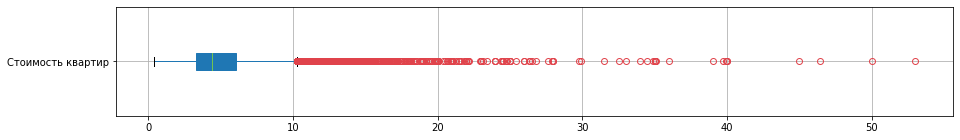

In [47]:
#Построим диаграмму размаха, чтобы увидеть явные выбросы
last_price_no_emissions=data.boxplot('last_price', vert=False, figsize=(15,2), patch_artist=True, flierprops=dict(markeredgecolor="#e0434b"),
            medianprops=dict(color='#71c451'))
last_price_no_emissions.set_yticklabels(['Стоимость квартир'])
plt.show()

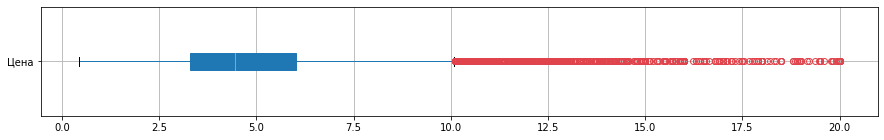

In [48]:
#Удалим явные выбросы
data.drop(data[data['last_price'] > 20].index, inplace=True)
data.drop(data[data['last_price'] < 0.4].index, inplace=True)
last_price_no_emissions=data.boxplot('last_price', vert=False, figsize=(15,2), patch_artist=True, flierprops=dict(markeredgecolor="#e0434b"),
            medianprops=dict(color='#71c451'))
last_price_no_emissions.set_yticklabels(['Цена'])
plt.show()

In [49]:
data['last_price'].shape[0]

21742

Подчистили явные выбросы. Весь хвост считаю удалять не правильно, так как недвижимость в Санкт-Петербурге может достигать и больших сумм. Это и люксовые квартиры, и квартиры знаменитостей.

Удалили все небходимые выдающиеся значения, и количество уделений не превышает 10% от изначального объёма данных.

### Посчитайте и добавьте в таблицу новые столбцы

In [50]:
#Добавим новый столбец - цена одного квадратного метра. Расчитывается как соотношение цены недвижимости на момент снятия
#с публикации к общей площади.

data['one_square_meter'] = (data['last_price'] / data['total_area'])

In [51]:
#Переведем день публикации объявления в формат datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")

In [52]:
#Добавим новый столбец - день недели публикации объявления
data['day_of_publication'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

In [53]:
#Добавим новый столбец - месяц публикации объявления
data['publication_month'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [54]:
#Добавим новый столбец - год публикации объявления
data['publication_year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [55]:
#Тип этажа квартиры - добавим новый столбец по этажу, на котором находится квартира
def floor_type(row):
        if row[8] == 1:
            return 'первый'
        if row['floor'] == row['floors_total']:
            return 'Последний'
        else:
            return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)
data['floor_type'].value_counts()

другой       15909
Последний     3056
первый        2777
Name: floor_type, dtype: int64

In [56]:
#Добавим новый столбец -расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()

### Проведите исследовательский анализ данных

<AxesSubplot:ylabel='Frequency'>

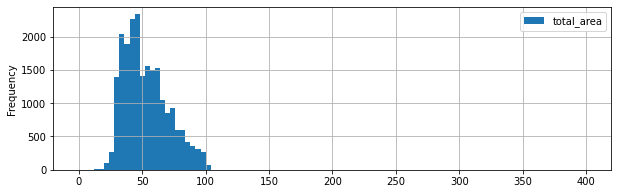

In [57]:
#общая площадь
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (10,3), range = (0,400))

Большинство квартир менее 100 кв.м., большая площать встрачается редко. Наибольшее число квартир наблюдается с общей блощадью от 30 до 50 кв.м.

<AxesSubplot:ylabel='Frequency'>

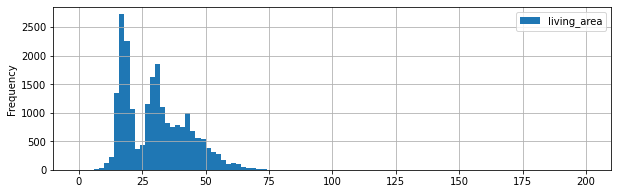

In [58]:
#жилая площадь
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (10,3), range = (0,200))

Самы распространенные варианты жилой площади от 10 до 20, резкое понижение, и следующие по большему колличеству от 25 до 30. 
После 75 единичные случае.

<AxesSubplot:ylabel='Frequency'>

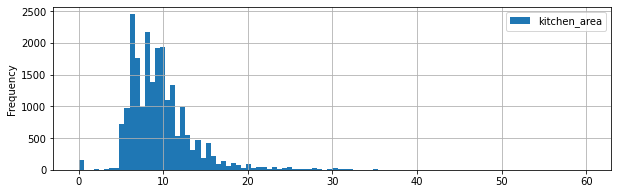

In [59]:
#площадь кухни
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (10,3), range = (0,60))

Самые распространенные варианты по площади кухни, встречается от 5 до 10 кв.м. Более 30 кв.м. единичные случа

<AxesSubplot:ylabel='Frequency'>

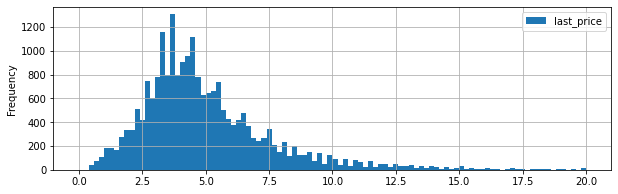

In [60]:
#цена объекта
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,20), figsize = (10,3))

Большая часть квартир встречаются в диапозоне от 2,7 до 5 миллионов рублей.  После 8 миллионов идет резкое понижение в стоимости и встречаются единичные случаи.

<AxesSubplot:ylabel='Frequency'>

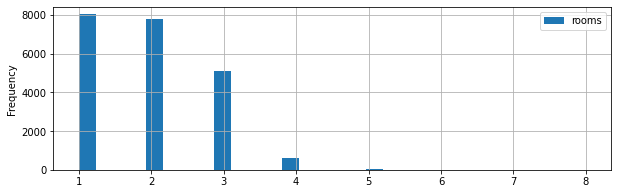

In [61]:
 #количество комнат
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True,range = (1,8), figsize = (10,3))

Больше всего квартир 1, 2 и 3-х комнатные. Так же имеются квартиры с количеством комнат более 5, это подозрительно, возможно это квартиры которые относятся к комуналкам.

<AxesSubplot:ylabel='Frequency'>

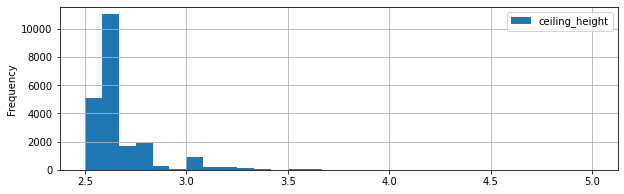

In [62]:
#высота потолков
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2.5,5), grid=True, figsize = (10,3))

Больше всего квартир с высотой потолков 2,6.

<AxesSubplot:ylabel='Frequency'>

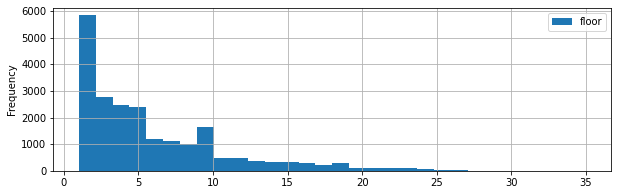

In [63]:
#этаж квартиры
data.plot(y = 'floor', kind = 'hist', bins = 30, range = (1,35), grid=True, figsize = (10,3))

Большое количествоквартр находятся с 1 по 5 этаж.

<AxesSubplot:>

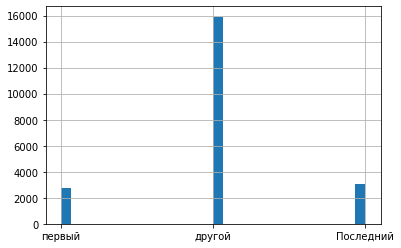

In [64]:
#тип этажа квартиры 
data['floor_type'].hist(bins = 30)

Большее количество квартир находятся не на первом и не на последнем этаже.

<AxesSubplot:ylabel='Frequency'>

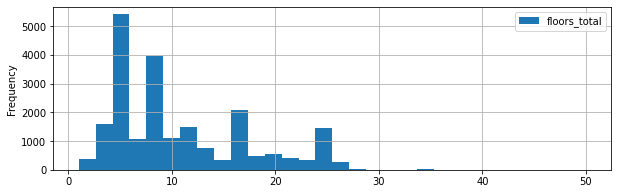

In [65]:
#общее количество этажей в доме
data.plot(y = 'floors_total', kind = 'hist', bins = 30, range = (1,50), grid=True, figsize = (10,3))

Большинство домов имеет 5 этажей.

<AxesSubplot:ylabel='Frequency'>

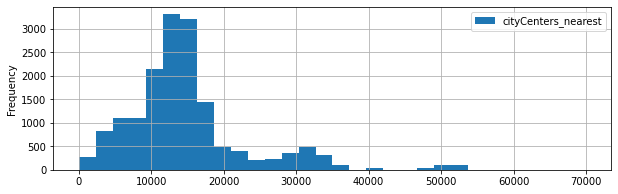

In [66]:
#расстояние до центра города в метрах
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 30, range = (0,70000), grid=True, figsize = (10,3))

Часто встречаемые объявления находятся далее чем 15000 м от центра города. Так же встречаются единичные случаи от 40000 и далее, можно предположить что это квартиры которые находятся в селах.

<AxesSubplot:ylabel='Frequency'>

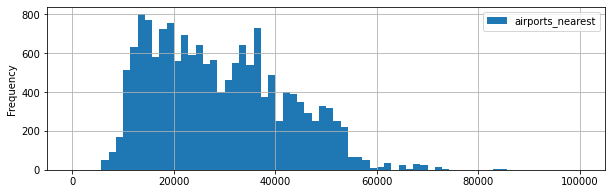

In [67]:
#расстояние до ближайшего аэропорта
data.plot(y = 'airports_nearest', kind = 'hist', bins = 70, range = (0,100000), grid=True, figsize = (10,3))

Больше всего квартир находятся на расстоянии до аэропорта от 18000 до 25000 м.

<AxesSubplot:ylabel='Frequency'>

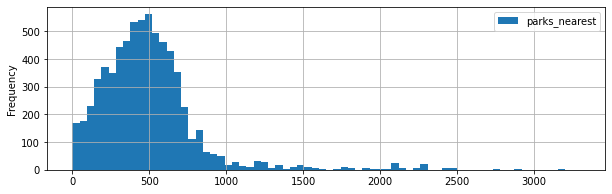

In [68]:
#расстояние до ближайшего парка
data.plot(y = 'parks_nearest', kind = 'hist', bins = 70, range = (0,3300), grid=True, figsize = (10,3))

Пик наблюдается в отметке 500м.Имеются единичные случаи квартир с расстоянием до ближайшего парка от 1000 до 3200м, предполагаю что эти квартиры располагаются в городах, селах и деревнях, где парка внутри населеного пункта не имеется.

<AxesSubplot:ylabel='Frequency'>

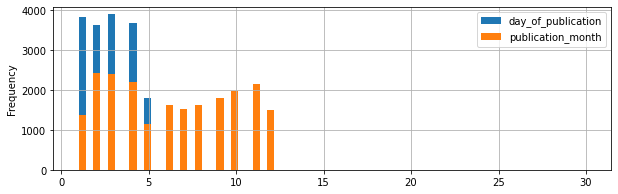

In [69]:
#день и месяц публикации объявления
data.plot(y = ['day_of_publication','publication_month'], kind = 'hist', bins = 70, range = (1,30), grid=True, figsize = (10,3))

Большая часть объявлений подавалась до 5 числа каждого месяца, и пик пришелся на первый квартал месяца.

__Задание__


Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.

In [70]:
#Посчитаем среднее и медианное значение
data['days_exposition'].describe()

count    19034.000000
mean       172.246769
std        210.749920
min          1.000000
25%         44.000000
50%         91.000000
75%        217.000000
max       1580.000000
Name: days_exposition, dtype: float64

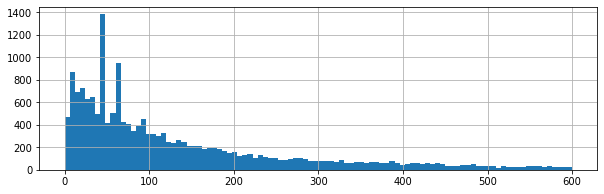

In [71]:
data['days_exposition'].hist(bins=100, range=(0,600), figsize = (10,3));

Медианное время продажи - 91 день, среднее время продажи - 172 день. В основном квартиры продаются в течении 3-х месяцев. Но среднее значение больше медианной, это говорит о том, что распределение имеет длинный хвост, что мы и видим в числовом описании выше, максимальное - 1580. 1580 дней это более 4-х лет, можно предположить, что квартиру уже продали, и объявление продалжает "висеть" в активных, либо в какой-то момент передумали продавать и попросту забыли снять объявление.
Так же имеются продажи в 1 день.

__Задание__

Какие факторы больше всего влияют на общую (полную) стоимость объекта?

- Зависит ли цена от общей площади 

<AxesSubplot:xlabel='total_area'>

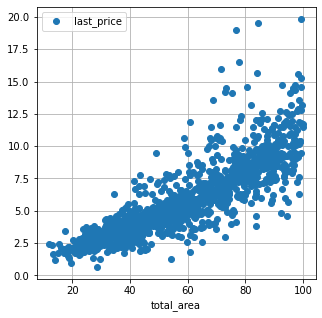

In [72]:
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))

Цена зависит от общей площади, чем больше площадь, тем выше цена.

- зависит ли цена от жилой площади

<AxesSubplot:xlabel='living_area'>

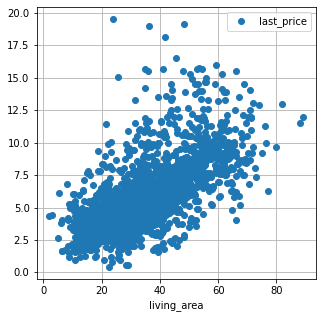

In [73]:
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))

Цена зависит от жилой площади, чем больше площадь, тем выше цена.

- зависит ли цена от площади кухни

<AxesSubplot:xlabel='last_price'>

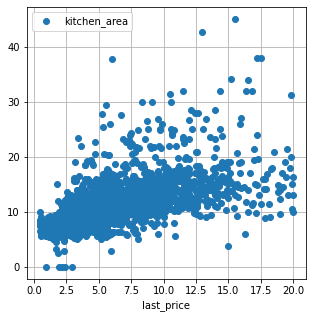

In [74]:
data.pivot_table(index='last_price', values='kitchen_area').plot(grid=True, style='o', figsize=(5, 5))

Основная масса показателей находится приблезительно в одном интервале, поэтому можно сделать вывод, что площадь кухни не сильно влияет на ее стоимость.

- зависит ли цена от количества комнат.

Прежде почистим и уберем редкие и выбивающиеся значения

In [75]:
data_iz = data.query('rooms >= 1 and rooms <= 10')

<AxesSubplot:xlabel='rooms'>

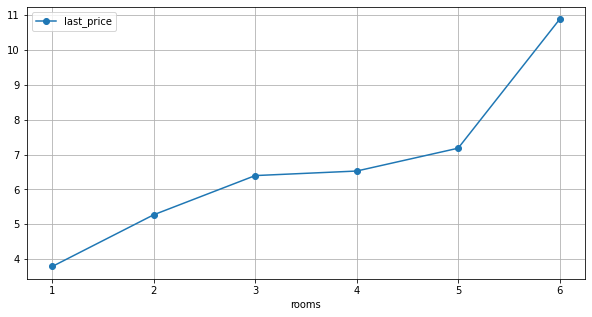

In [76]:
data_iz.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(10, 5))

Можно сделать вывод, что однокомнатные квартиры стоят дешевле всего, далее стоимость квартир растет по мере увелечения комнат.

- зависит ли цена от этажа, на котором расположена квартира (первый, последний, другой)

<AxesSubplot:xlabel='floor_type'>

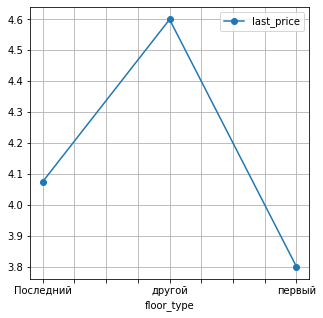

In [77]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))

Квартиры расположенные на первом этаже стоят дешевле всего, пик стоимости приходится на "другие этажи", и квартиры расположенные на последнем этаже стоят дешевле, чем те что в сегменте "другие".

- зависит ли цена от даты размещения (день недели, месяц, год)

<AxesSubplot:xlabel='day_of_publication'>

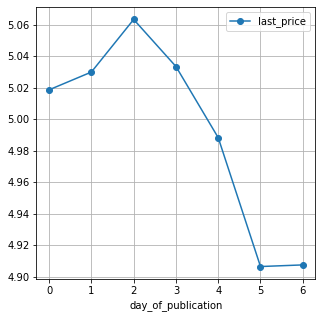

In [78]:
# Зависимость от дня недели
data.pivot_table(index='day_of_publication', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))

Самые дорогие квартиры опубликован в среду, а самые дешевые в выходные дни.

<AxesSubplot:xlabel='publication_month'>

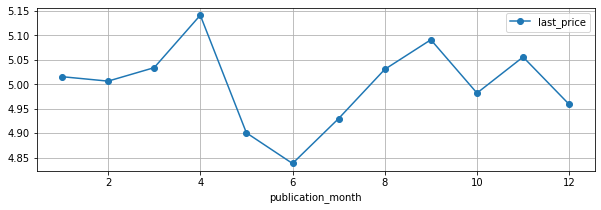

In [79]:
# Зависимость от месяца
data.pivot_table(index='publication_month', values='last_price').plot(grid=True, style='o-', figsize=(10, 3))

Пик стоимости квартир приходится на апрель.

<AxesSubplot:xlabel='publication_year'>

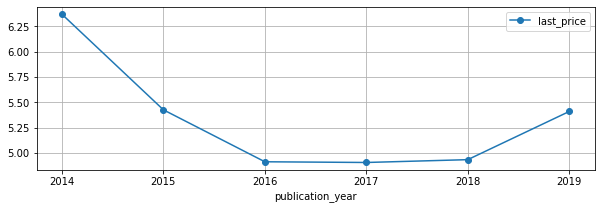

In [80]:
# Зависимость от года
data.pivot_table(index='publication_year', values='last_price').plot(grid=True, style='o-', figsize=(10, 3))

Самые дорогие квартиры продавались в 2014г., после 2014г. по 2018 наблюдается активный спад, скорее всего это было связано с падение цен на недвижимость и покупательскую способность, в связи с экономической ситуацией в мире. Начиная с 2019г. стоимость на квартиры начала рости.

__Задание__

Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [81]:
top10_max = (data
 .pivot_table(index='locality_name', values='one_square_meter',aggfunc=('count', 'median'))
 .sort_values('count',axis=0, ascending=False)              
 .head(10))
top10_max

,count,median
locality_name,,
Санкт-Петербург,13972,0.103448
поселок Мурино,556,0.085878
поселок Шушары,431,0.077049
Всеволожск,392,0.065789
Пушкин,339,0.098601
Колпино,332,0.074724
поселок Парголово,324,0.091984
Гатчина,301,0.067925
деревня Кудрово,297,0.091803


В Санкт-Петербурге самая высокая стоимость квадратного метра. Самая низкая стоимость квадратного метра в Выборге.

__Задание__

Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

<AxesSubplot:xlabel='cityCenters_nearest_km'>

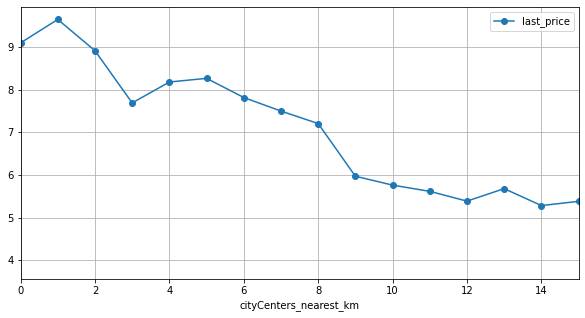

In [82]:
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km', values='last_price').plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))

Стоимость объякта напрямую зависит от расстояния до центра города. Чем ближе квартира к центру, тем она дороже.

### Общий вывод

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>В этом проекте были проанализированы данные объявлений о продаже квартир в городе Санкт-Петербурге и пригороде, которые включают в себя такие характеристики как цена, площадь квартиры, дата публикации, число комнат, высота потолков, этажность дома, жилая площадь, этаж, принадлежность квартиры к студии или апартаментам, наличие свободной планировки, площадь кухни, число балконов, название населённого пункта, расстояние до ближайшего аэропорта, центра города, парка и водоёма, длительность размещения объявления.
Были рассчитаны и добавлены в таблицу данные о цене одного квадратного метра; день недели публикации, месяц и год публикации объявления; категория этажа квартиры. Эти данные использовались для корректного анализа.

В процессе анализа было выявлено, что в основном квартиры продаются в течении 3-х месяцев – это медианное значение. Но среднее значение больше медианной, это говорит о том, что распределение имеет длинный хвост, что мы и видим в числовом описании выше, максимальное - 1580. 1580 дней это более 4-х лет, можно предположить, что квартиру уже продали, и объявление продолжает "висеть" в активных, либо в какой-то момент передумали продавать и попросту забыли снять объявление.
Изучили факторы влияющие на стоимость квартир, так например между общей и жилой площадью квартиры и ее стоимостью есть прямая связь, чем выше площадь квартиры, тем выше ее стоимость, в то же время количество комнат не влияет на стоимость, как и площадь кухни.  Стоимость объекта напрямую зависит от расстояния до центра города. Чем ближе квартира к центру, тем она дороже.
Стоит отметить, что этаж квартиры, так же влияет на стоимость, так квартиры, расположенные на первом и последнем этаже, стоят дешевле всего, пик стоимости приходится на «другие этажи».
Провели анализ по году размещения объявления, и увидели, что самые дорогие квартиры продавались в 2014г., после 2014г. по 2018 наблюдается активный спад, скорее всего это было связано с падение цен на недвижимость и покупательскую способность, в связи с экономической ситуацией в мире. Начиная с 2019г. стоимость на квартиры начала расти.
Провели анализ в самом крупном по количеству объявление городе – Санкт-Петербург. Так в Санкт-Петербурге стоимость 1 кв.м. значительно выше, чем в соседних городах и селах, входящие в один регион проживания. И чем ближе квартира располагается к центру Санкт-Петербурга, тем она дороже.

</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод